Importing Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx")
data

,Unnamed: 0,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,KPMG Virtual Internship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Sprocket Central Pty Ltd Data Set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,"7) For the rest of this Module 1 task, it is u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='Transactions')
new_customer_lists  = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='NewCustomerList')
customer_demographic =pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",header=1, sheet_name="CustomerDemographic")
customer_address = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",header=1, sheet_name= "CustomerAddress")

In [4]:
print('shape no of transaction is',transactions.shape)
print('customer transaction information',transactions.info())

shape no of transaction is (20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB
customer transaction information None


In [5]:
print("shape no of new customer list",new_customer_lists.shape)
print("customer lists information",new_customer_lists.info())

shape no of new customer list (1000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country     

In [6]:
print("shape no of customer demographic",customer_demographic.shape)
print("customer demographic information",customer_demographic.info())

shape no of customer demographic (4000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
mem

Merging Customer Data

In [7]:
set(customer_demographic.customer_id).symmetric_difference(customer_address.customer_id)

{3, 10, 22, 23, 4001, 4002, 4003}

In [8]:
demographic = pd.merge(customer_demographic,customer_address,how='left')

In [9]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [10]:
demographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
â°â´âµâââ                                  53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

Dropping the default column 

In [11]:
drop_col = ['default']
demographic = demographic.drop(drop_col,axis=1)

In [12]:
Df = demographic[['first_name','last_name']].isin(new_customer_lists)[['first_name','last_name']]

In [13]:
print(Df)

      first_name  last_name
0          False      False
1          False      False
2          False      False
3          False      False
4          False      False
...          ...        ...
3995       False      False
3996       False      False
3997       False      False
3998       False      False
3999       False      False

[4000 rows x 2 columns]


In [14]:
new_customer_lists.insert(0,'customer_id',range(4004,4004+len(new_customer_lists)))

In [15]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,4004,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,4005,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,4006,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,4007,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,4008,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


Concatinating Customer Datas

In [16]:
customer = pd.concat([new_customer_lists,demographic])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [17]:
customer.head()

,DOB,Rank,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Value,address,country,...,job_industry_category,job_title,last_name,owns_car,past_3_years_bike_related_purchases,postcode,property_valuation,state,tenure,wealth_segment
0,1957-07-12,1.0,0.56,0.7000,0.8750,0.743750,1.0,1.718750,45 Shopko Center,Australia,...,Manufacturing,General Manager,Brister,Yes,86,4500.0,6.0,QLD,14.0,Mass Customer
1,1970-03-22,1.0,0.89,0.8900,1.1125,0.945625,1.0,1.718750,14 Mccormick Park,Australia,...,Property,Structural Engineer,Genery,No,69,2113.0,11.0,NSW,16.0,Mass Customer
2,1974-08-28,1.0,1.01,1.0100,1.0100,1.010000,1.0,1.718750,5 Colorado Crossing,Australia,...,Financial Services,Senior Cost Accountant,Forrester,No,10,3505.0,5.0,VIC,10.0,Affluent Customer
3,1979-01-28,4.0,0.87,1.0875,1.0875,1.087500,4.0,1.703125,207 Annamark Plaza,Australia,...,Manufacturing,Account Representative III,Stutt,Yes,64,4814.0,1.0,QLD,5.0,Affluent Customer
4,1965-09-21,4.0,0.52,0.5200,0.6500,0.650000,4.0,1.703125,115 Montana Place,Australia,...,Financial Services,Financial Analyst,Hadlee,No,34,2093.0,9.0,NSW,19.0,Affluent Customer


In [18]:
print('shape of data',customer.shape)

shape of data (5000, 24)


In [19]:
print('customer data',customer.columns)

customer data Index(['DOB', 'Rank', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Value', 'address', 'country',
       'customer_id', 'deceased_indicator', 'first_name', 'gender',
       'job_industry_category', 'job_title', 'last_name', 'owns_car',
       'past_3_years_bike_related_purchases', 'postcode', 'property_valuation',
       'state', 'tenure', 'wealth_segment'],
      dtype='object')


In [20]:
customer.dtypes

DOB                                    datetime64[ns]
Rank                                          float64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                                   float64
Unnamed: 19                                   float64
Unnamed: 20                                   float64
Value                                         float64
address                                        object
country                                        object
customer_id                                     int64
deceased_indicator                             object
first_name                                     object
gender                                         object
job_industry_category                          object
job_title                                      object
last_name                                      object
owns_car                                       object
past_3_years_bike_related_pu

Data Preprocessing

In [21]:
print(customer.isnull().sum())

DOB                                     104
Rank                                   4000
Unnamed: 16                            4000
Unnamed: 17                            4000
Unnamed: 18                            4000
Unnamed: 19                            4000
Unnamed: 20                            4000
Value                                  4000
address                                   4
country                                   4
customer_id                               0
deceased_indicator                        0
first_name                                0
gender                                    0
job_industry_category                   821
job_title                               612
last_name                               154
owns_car                                  0
past_3_years_bike_related_purchases       0
postcode                                  4
property_valuation                        4
state                                     4
tenure                          

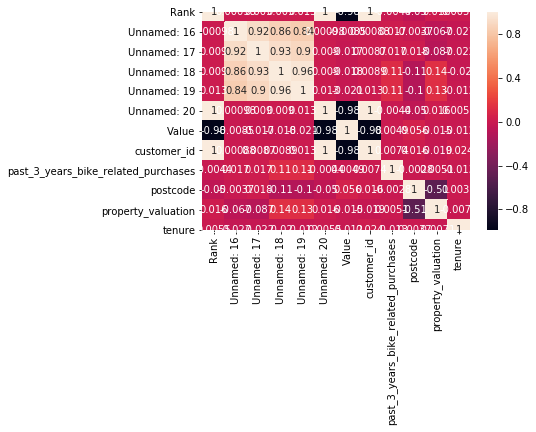

In [22]:
sns.heatmap(customer.corr(),annot=True)

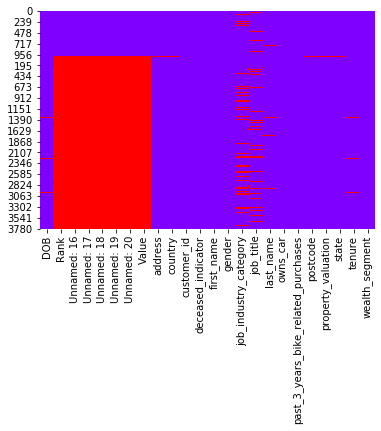

In [23]:
sns.heatmap(customer.isnull(),cbar = False,cmap='rainbow')

In [24]:
drop_col = ['Rank','Value']
customer = customer.drop(drop_col,axis=1)

In [25]:
customer['job_title'].fillna('unkonwn',inplace=True)
customer['job_industry_category'].fillna('unknown',inplace=True)
customer['last_name'].fillna('unknown',inplace=True)

In [26]:
customer['tenure'].fillna((customer['tenure'].mean()),inplace=True)

In [27]:
def age(date):
    age=(pd.to_datetime('today').year-pd.to_datetime(date).year)
    return age
customer['age'] = customer['DOB'].apply(age)
customer= customer.drop('DOB',axis=1)

In [28]:
customer['age'].fillna((customer['age'].mode()[0]), inplace=True)

In [29]:
customer.head()

,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,address,country,customer_id,deceased_indicator,first_name,...,job_title,last_name,owns_car,past_3_years_bike_related_purchases,postcode,property_valuation,state,tenure,wealth_segment,age
0,0.56,0.7000,0.8750,0.743750,1.0,45 Shopko Center,Australia,4004,N,Chickie,...,General Manager,Brister,Yes,86,4500.0,6.0,QLD,14.0,Mass Customer,64.0
1,0.89,0.8900,1.1125,0.945625,1.0,14 Mccormick Park,Australia,4005,N,Morly,...,Structural Engineer,Genery,No,69,2113.0,11.0,NSW,16.0,Mass Customer,51.0
2,1.01,1.0100,1.0100,1.010000,1.0,5 Colorado Crossing,Australia,4006,N,Ardelis,...,Senior Cost Accountant,Forrester,No,10,3505.0,5.0,VIC,10.0,Affluent Customer,47.0
3,0.87,1.0875,1.0875,1.087500,4.0,207 Annamark Plaza,Australia,4007,N,Lucine,...,Account Representative III,Stutt,Yes,64,4814.0,1.0,QLD,5.0,Affluent Customer,42.0
4,0.52,0.5200,0.6500,0.650000,4.0,115 Montana Place,Australia,4008,N,Melinda,...,Financial Analyst,Hadlee,No,34,2093.0,9.0,NSW,19.0,Affluent Customer,56.0


In [30]:
customer.loc[(customer["age"] == 64)]

,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,address,country,customer_id,deceased_indicator,first_name,...,job_title,last_name,owns_car,past_3_years_bike_related_purchases,postcode,property_valuation,state,tenure,wealth_segment,age
0,0.56,0.700,0.8750,0.743750,1.0,45 Shopko Center,Australia,4004,N,Chickie,...,General Manager,Brister,Yes,86,4500.0,6.0,QLD,14.0,Mass Customer,64.0
157,0.85,0.850,1.0625,0.903125,158.0,33652 Lyons Alley,Australia,4161,N,Roseanne,...,Programmer Analyst III,Caruth,No,16,2763.0,9.0,NSW,7.0,Mass Customer,64.0
243,0.94,0.940,0.9400,0.799000,244.0,5 High Crossing Junction,Australia,4247,N,Solomon,...,Junior Executive,Bruck,No,29,4556.0,8.0,QLD,12.0,Mass Customer,64.0
285,0.82,1.025,1.0250,1.025000,285.0,8427 Moulton Place,Australia,4289,N,Bink,...,Payment Adjustment Coordinator,Bentje,Yes,3,2680.0,3.0,NSW,19.0,High Net Worth,64.0
316,0.66,0.825,0.8250,0.701250,312.0,19 Debs Parkway,Australia,4320,N,Audry,...,Pharmacist,Fann,Yes,3,3029.0,6.0,VIC,15.0,Mass Customer,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,NaN,NaN,NaN,NaN,NaN,249 Anderson Street,Australia,3793,N,Shannen,...,Engineer IV,Pitcock,Yes,49,2153.0,10.0,NSW,15.0,Affluent Customer,64.0
3816,NaN,NaN,NaN,NaN,NaN,7681 Waywood Alley,Australia,3817,N,Tuckie,...,VP Product Management,unknown,No,65,3860.0,1.0,VIC,13.0,High Net Worth,64.0
3871,NaN,NaN,NaN,NaN,NaN,1323 Maywood Plaza,Australia,3872,N,Wilma,...,Sales Representative,Budcock,Yes,14,2226.0,10.0,NSW,12.0,High Net Worth,64.0
3955,NaN,NaN,NaN,NaN,NaN,86906 Hauk Trail,Australia,3956,N,Hector,...,Administrative Assistant III,Poundsford,Yes,54,4163.0,8.0,QLD,12.0,Mass Customer,64.0


In [31]:
print(customer.isnull().sum())

Unnamed: 16                            4000
Unnamed: 17                            4000
Unnamed: 18                            4000
Unnamed: 19                            4000
Unnamed: 20                            4000
address                                   4
country                                   4
customer_id                               0
deceased_indicator                        0
first_name                                0
gender                                    0
job_industry_category                     0
job_title                                 0
last_name                                 0
owns_car                                  0
past_3_years_bike_related_purchases       0
postcode                                  4
property_valuation                        4
state                                     4
tenure                                    0
wealth_segment                            0
age                                       0
dtype: int64


In [32]:
print(customer.age)

0       64.0
1       51.0
2       47.0
3       42.0
4       56.0
        ... 
3995    46.0
3996    20.0
3997    43.0
3998    48.0
3999    30.0
Name: age, Length: 5000, dtype: float64


In [33]:
print('no of rows in customer',customer.shape)

no of rows in customer (5000, 22)


In [34]:
customer['gender'].value_counts()

Female    2550
Male      2342
U          105
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [35]:
print(customer.isnull().sum())

Unnamed: 16                            4000
Unnamed: 17                            4000
Unnamed: 18                            4000
Unnamed: 19                            4000
Unnamed: 20                            4000
address                                   4
country                                   4
customer_id                               0
deceased_indicator                        0
first_name                                0
gender                                    0
job_industry_category                     0
job_title                                 0
last_name                                 0
owns_car                                  0
past_3_years_bike_related_purchases       0
postcode                                  4
property_valuation                        4
state                                     4
tenure                                    0
wealth_segment                            0
age                                       0
dtype: int64


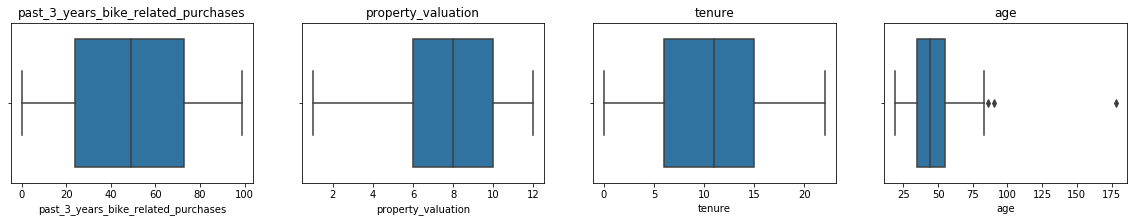

In [36]:
plt.figure(figsize=(20, 10))
X=customer
col = ['past_3_years_bike_related_purchases','property_valuation','tenure','age']

for i, col in enumerate(X[col]):
    plt.subplot(3, 4, i+1)
    x = customer[col]
    sns.boxplot(x)
    plt.title(col)

In [37]:
customer[customer.duplicated()].sum()

Unnamed: 16                            0.0
Unnamed: 17                            0.0
Unnamed: 18                            0.0
Unnamed: 19                            0.0
Unnamed: 20                            0.0
address                                0.0
country                                0.0
customer_id                            0.0
deceased_indicator                     0.0
first_name                             0.0
gender                                 0.0
job_industry_category                  0.0
job_title                              0.0
last_name                              0.0
owns_car                               0.0
past_3_years_bike_related_purchases    0.0
postcode                               0.0
property_valuation                     0.0
state                                  0.0
tenure                                 0.0
wealth_segment                         0.0
age                                    0.0
dtype: float64

In [38]:
print(customer.describe())

       Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.747340     0.839005     0.942673     0.870514   498.819000   
std       0.205082     0.248858     0.294832     0.280891   288.810997   
min       0.400000     0.400000     0.400000     0.340000     1.000000   
25%       0.570000     0.637500     0.712500     0.658750   250.000000   
50%       0.750000     0.820000     0.912500     0.842625   500.000000   
75%       0.920000     1.031875     1.142969     1.062500   750.250000   
max       1.100000     1.375000     1.718750     1.718750  1000.000000   

       customer_id  past_3_years_bike_related_purchases     postcode  \
count   5000.00000                          5000.000000  4996.000000   
mean    2501.10000                            49.079200  2992.439151   
std     1444.35173                            28.533471   845.758829   
min        1.00000                           

Age

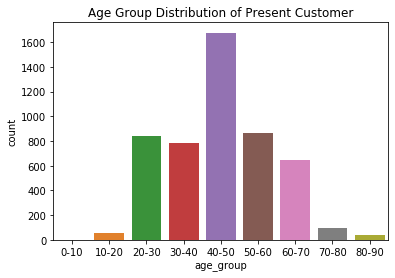

In [39]:
customer['age_group'] = pd.cut(x=customer['age'],bins=[0,10,20,30,40,50,60,70,80,90],labels=['0-10','10-20','20-30',
                                                            '30-40','40-50','50-60','60-70','70-80','80-90'], right=True)
sns.countplot(x ='age_group',data=customer)
plt.title('Age Group Distribution of Present Customer')
plt.show()

State

In [40]:
customer['state'].value_counts()

NSW                2558
VIC                1205
QLD                1065
New South Wales      86
Victoria             82
Name: state, dtype: int64

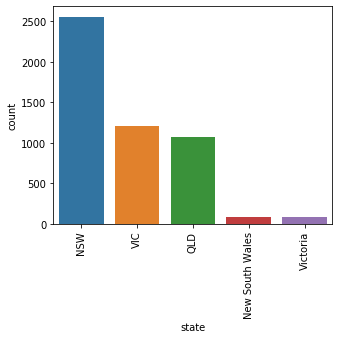

In [41]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x="state",data=customer,order = customer['state'].value_counts().index)
plt.show()

Country

In [42]:
customer['country'].value_counts()

Australia    4996
Name: country, dtype: int64

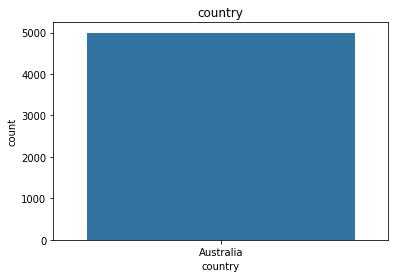

In [43]:
sns.countplot(x = 'country', data = customer)
plt.title('country')
plt.show()

deceased

In [44]:
customer['deceased_indicator'].value_counts()

N    4998
Y       2
Name: deceased_indicator, dtype: int64

As we have 2 rows in Y category , It doesnt provide much insight. Dropping the column

In [45]:
customer.drop(columns='deceased_indicator',inplace=True)

Gender

In [46]:
customer['gender'].value_counts()

Female    2550
Male      2342
U          105
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [47]:
customer['gender'].replace({'M':'Male','F':'Female','Femal':'Female','U':'Unknown'},inplace=True)

In [48]:
customer['gender'].value_counts()

Female     2552
Male       2343
Unknown     105
Name: gender, dtype: int64

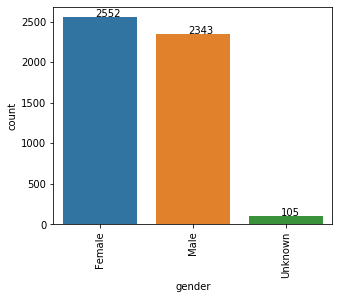

In [49]:
plt.figure(figsize=(5,4))
ax=sns.countplot("gender", data = customer,order = customer['gender'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

job_industry_category

In [50]:
customer['job_industry_category'].value_counts()

Manufacturing         998
Financial Services    977
unknown               821
Health                754
Retail                436
Property              331
IT                    274
Entertainment         173
Argiculture           139
Telecommunications     97
Name: job_industry_category, dtype: int64

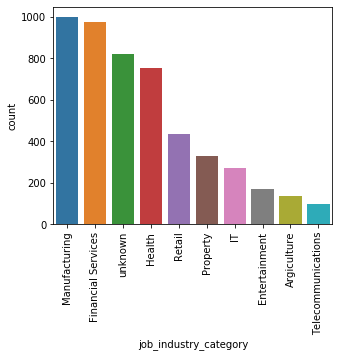

In [51]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x="job_industry_category",data=customer,order = customer['job_industry_category'].value_counts().index)
plt.show()

job title

In [52]:
customer['job_title'].value_counts()

unkonwn                                 612
Social Worker                            55
Business Systems Development Analyst     55
Associate Professor                      54
Recruiting Manager                       50
                                       ... 
Programmer Analyst IV                     5
Computer Systems Analyst III              5
Geologist II                              4
Health Coach I                            4
Developer I                               4
Name: job_title, Length: 196, dtype: int64

Own Car

In [53]:
customer['owns_car'].value_counts()

Yes    2517
No     2483
Name: owns_car, dtype: int64

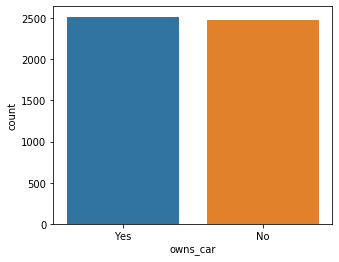

In [81]:
plt.figure(figsize=(5,4))
sns.countplot(x='owns_car',data=customer,order=customer['owns_car'].value_counts().index)
plt.show()

wealth segment

In [55]:
customer['wealth_segment'].value_counts()

Mass Customer        2508
High Net Worth       1272
Affluent Customer    1220
Name: wealth_segment, dtype: int64

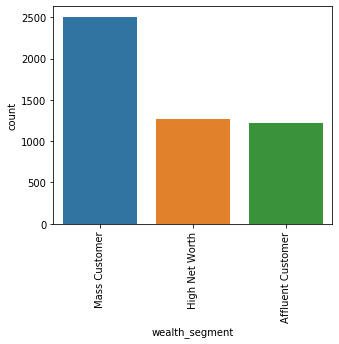

In [56]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x='wealth_segment',data=customer,order=customer['wealth_segment'].value_counts().index)
plt.show()

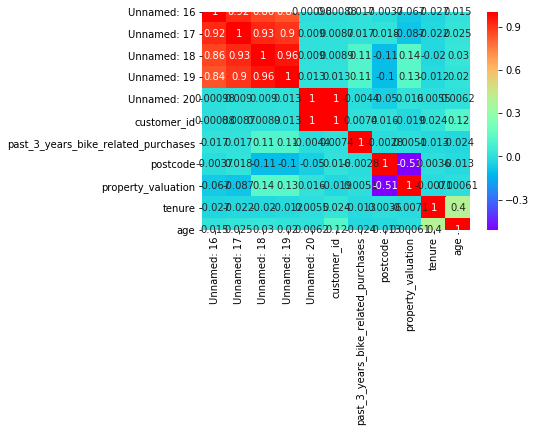

In [57]:
sns.heatmap(data=customer.corr(),annot=True,cmap='rainbow')

Data Preprocessing 

In [58]:
print("shape of transactions column is",transactions.shape)
transactions.info()

shape of transactions column is (20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [59]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [60]:
print(transactions.isnull().sum())

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


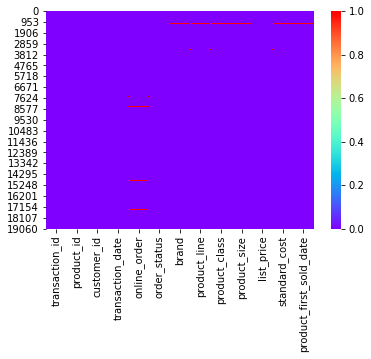

In [61]:
sns.heatmap(data=transactions.isnull(),cmap='rainbow')

Null Value Analysis

In [62]:
drop_column = ['online_order']
transactions = transactions.drop(drop_column,axis=1)

In [63]:
transactions.dropna(subset= ['product_first_sold_date'], inplace = True)

In [64]:
print(transactions.isnull().sum())

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64


In [65]:
transactions['brand'].fillna(value='unknown',inplace=True)
transactions['product_line'].fillna(value = 'Unknown', inplace = True)
transactions['product_size'].fillna(value = 'Unknown', inplace = True)

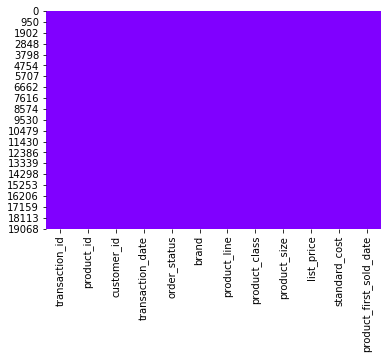

In [66]:
sns.heatmap(data=transactions.isnull(),cbar=False,cmap='rainbow')

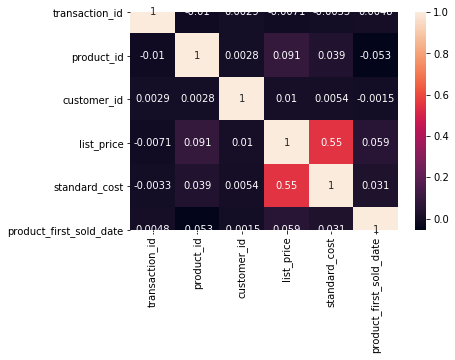

In [67]:
sns.heatmap(data=transactions.corr(),annot=True)

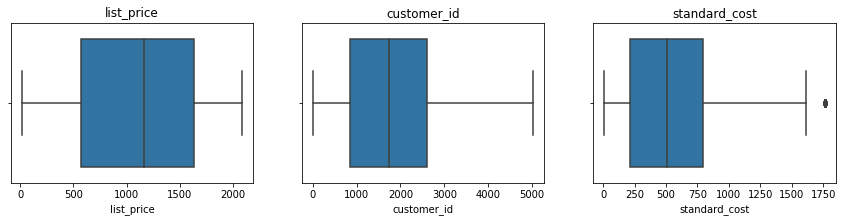

In [68]:
plt.figure(figsize=(20, 10))
X=transactions
col = ['list_price','customer_id','standard_cost']
# i: index
for i, col in enumerate(X[col]):
    plt.subplot(3, 4, i+1)
    x = transactions[col]
    sns.boxplot(x)
    plt.title(col)


Exploring Duplicate values

In [73]:
transactions[transactions.duplicated()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [74]:
print(transactions.describe())

       transaction_id    product_id   customer_id    list_price  \
count    19803.000000  19803.000000  19803.000000  19803.000000   
mean      9993.979650     45.815937   1739.294955   1107.997866   
std       5776.499961     30.569841   1011.946353    582.770460   
min          1.000000      0.000000      1.000000     12.010000   
25%       4988.500000     18.000000    858.000000    575.270000   
50%       9995.000000     45.000000   1738.000000   1163.890000   
75%      15000.500000     72.000000   2615.000000   1635.300000   
max      20000.000000    100.000000   5034.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      175

In [76]:
transactions['customer_id'].count()

19803

In [77]:
transactions['customer_id'].max()

5034

In [79]:
transactions['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

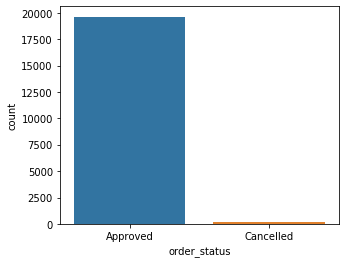

In [88]:
plt.figure(figsize=(5,4))
sns.countplot(x='order_status',data=transactions,order=transactions['order_status'].value_counts().index)
plt.show()

In [90]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

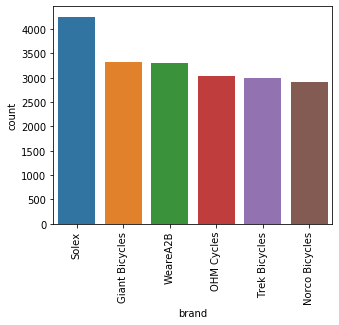

In [91]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x='brand',data=transactions,order=transactions['brand'].value_counts().index)
plt.show()

In [92]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

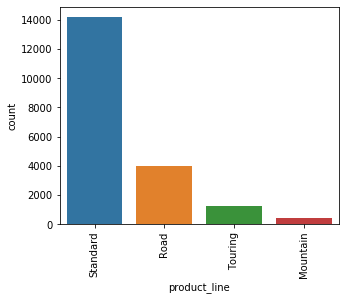

In [93]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x='product_line',data=transactions,order=transactions['product_line'].value_counts().index)
plt.show()

In [94]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

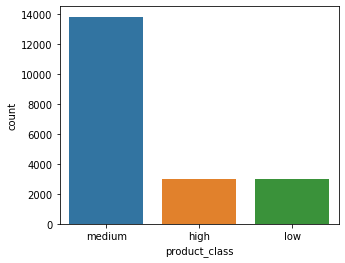

In [96]:
plt.figure(figsize=(5,4))
sns.countplot(x='product_class',data=transactions,order=transactions['product_class'].value_counts().index)
plt.show()

In [97]:
transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

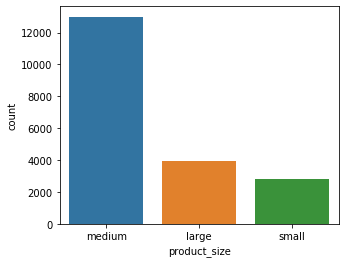

In [98]:
plt.figure(figsize=(5,4))
sns.countplot(x='product_size',data=transactions,order=transactions['product_size'].value_counts().index)
plt.show()

In [100]:
transactions['product_first_sold_date'].head()

0    41245.0
1    41701.0
2    36361.0
3    36145.0
4    42226.0
Name: product_first_sold_date, dtype: float64

In [105]:
transactions['product_first_sold_date']=pd.to_datetime(transactions['product_first_sold_date'])
transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

correlation matrix

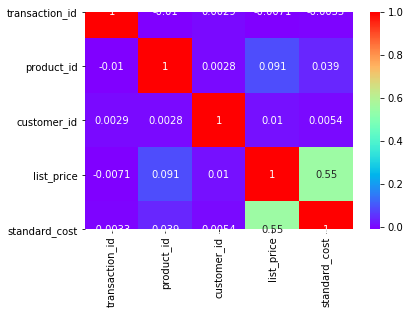

In [111]:
sns.heatmap(data=transactions.corr(),annot=True,cmap='rainbow')

Using List_price and Cost we can calculate profit